## Introduction

In this homework, you will explore the California Housing Dataset. You will begin by loading and accessing the dataset, then proceed to explore its distributions and correlations. Next, you will apply feature transformation techniques, such as log transformation and one-hot encoding, to prepare the data for analysis.

By the end of this assignment, you will have gained hands-on experience in data preprocessing, an essential step in any data mining project. Complete the required tasks using Python code in a Jupyter Notebook. For textual responses, insert a text block and write your answers using Markdown.

## California Housing Dataset

### Data Set Columns:

1. **longitude:** A measure of how far west a house is located; higher values indicate a location farther west.
2. **latitude:** A measure of how far north a house is located; higher values indicate a location farther north.
3. **housingMedianAge:** The median age of houses within a block; lower numbers represent newer buildings.
4. **totalRooms:** The total number of rooms within a block.
5. **totalBedrooms:** The total number of bedrooms within a block.
6. **population:** The total number of people residing within a block.
7. **households:** The total number of households, where a household is defined as a group of people residing in a single home unit, within a block.
8. **medianIncome:** The median income for households within a block (measured in tens of thousands of US dollars).
9. **medianHouseValue:** The median house value for households within a block (measured in US dollars).
10. **oceanProximity:** The location of the house in relation to the ocean or sea.

### References:

- Pace, R. Kelley, and Ronald Barry. "Sparse Spatial Autoregressions." *Statistics and Probability Letters*, 33 (1997): 291-297.


### Question 1: Access and Explore the Dataset

1. **Load the Dataset:**
   - Use the `pandas.read_csv()` function to load the California Housing Dataset. The dataset will be provided to you as a CSV file.
   
    Follow this link for more details on how to use `read_csv`: [pandas.read_csv() Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

2. **View the Dataset:**
   - Display the first few rows of the dataset using the `head()` method to get an initial understanding of its structure.
   
    Refer to this link for details: [pandas.DataFrame.head() Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html).
   - Generate a statistical summary of the dataset using the `describe()` method. This will give you insights into the distribution and basic statistics of each column.
   
    For more information, visit: [pandas.DataFrame.describe() Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html).

In [5]:
import pandas as pd


In [7]:
df = pd.read_csv('/content/sample_data/housing (1).csv')

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Question 2: Examine Column Distributions

1. **Plot Box-and-Whisker Plots:**
   - Use the `boxplot()` function from `pandas` to create box-and-whisker plots for each of the following columns. This will help you visualize the distribution, identify outliers, and understand the spread of the data.
   [pandas.DataFrame.boxplot() Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)
   
   - Columns to plot:
     - `housingMedianAge`
     - `medianIncome`
     - `medianHouseValue`

2. **Plot Histograms:**
   - Use the `hist()` function to create histograms for each of the following columns. This will allow you to examine the distribution and identify any patterns such as skewness or bimodality.
   [pandas.DataFrame.hist() Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

   - Columns to plot:
     - `housingMedianAge`
     - `medianIncome`
     - `medianHouseValue`


In [11]:
columns_to_plot = ['housing_median_age', 'median_income', 'median_house_value']

<Axes: >

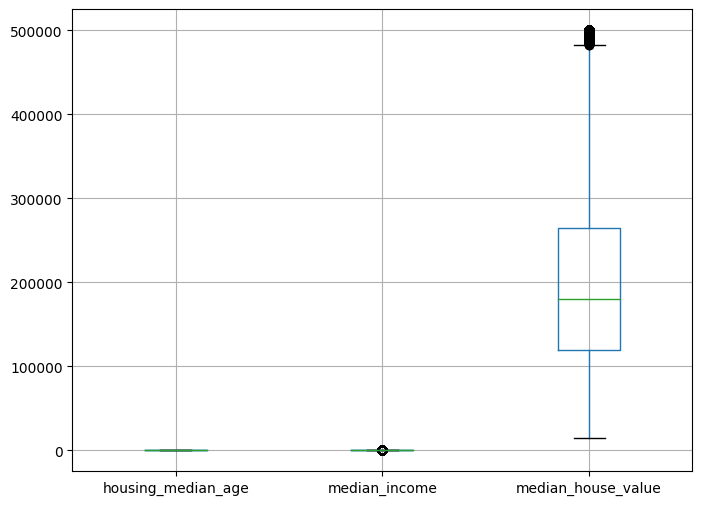

In [12]:
df.boxplot(column=columns_to_plot, figsize=(8, 6))

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >]],
      dtype=object)

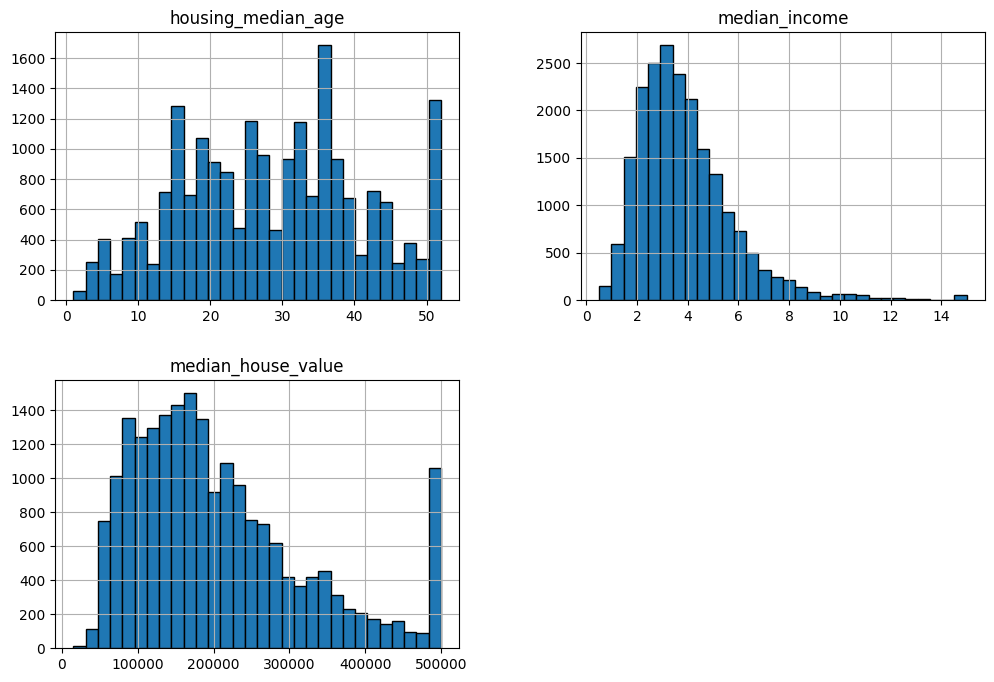

In [13]:
df[['housing_median_age', 'median_income', 'median_house_value']].hist(
    bins=30,
    figsize=(12, 8),
    edgecolor='black'
)

### Question 3: Examine Correlations Among Numerical Columns

1. **Calculate the Correlation Matrix:**
   - Use the `.corr()` method in `pandas` to calculate the correlation matrix for all numerical columns in the dataset. This will help you understand the relationships between different numerical features.

    [pandas.DataFrame.corr() Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

   - Columns to include in the correlation matrix:
     - `longitude`
     - `latitude`
     - `housingMedianAge`
     - `totalRooms`
     - `totalBedrooms`
     - `population`
     - `households`
     - `medianIncome`
     - `medianHouseValue`

2. **Display the Correlation Matrix:**
   - Visualize the correlation matrix using the `heatmap` function from `seaborn`. This will allow you to see the strength and direction of correlations between the numerical columns.
   
    [seaborn.heatmap() Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

   - After visualizing, identify and note the highest and lowest correlations between pairs of columns.



In [14]:
corr_matrix = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']].corr()
corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


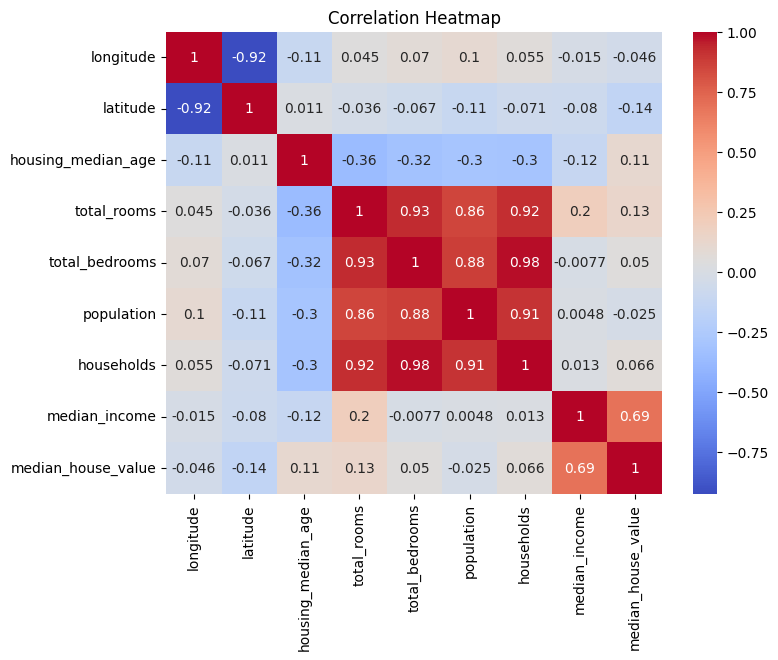

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

highest and lowest correlations between pairs of columns are:

Highest: total_bedrooms & households

Lowest:  latitude & longitude


### Authentication: Write Down Your Information

In the following code block, print your Student ID, Name, and Homework number in the specified format:

```python
# Replace the placeholders with your actual information
info = [yourid, yourname, homework_number]
for id, name, homework in info:
    print(f'ID: {id}\nName: {name}\nHomework: {homework}')


In [16]:
info = [('1002162937', 'Swathi Manjunatha', '001')]
for id, name, homework in info:
    print(f'ID: {id}\nName: {name}\nHomework: {homework}')

ID: 1002162937
Name: Swathi Manjunatha
Homework: 001


### Question 4: Feature Transformation

1. **Apply One-Hot Encoding:**
   - Use the `OneHotEncoder` from `sklearn.preprocessing` to transform the `ocean_proximity` column into multiple binary (0/1) columns.
   
    [OneHotEncoder Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
   - Ensure that the new columns accurately represent the different categories within `ocean_proximity`.
   - Display the first 5 rows of the transformed DataFrame to verify the changes.

2. **Apply Log Transformation:**
   - Use the `log` function from either the `math` or `numpy` library to transform the `households` column.
   
    [Log Documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html)
   - Plot histograms of the `households` column both before and after the log transformation to compare the distributions.


In [18]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding
encoder = OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[['ocean_proximity']])

# Create a new DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Join the encoded DataFrame with the original DataFrame
encoded_df = df.join(encoded_df).drop('ocean_proximity',axis=1)

encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


In [33]:
# Log transformation of the households column
import numpy as np
df['Log_Households'] = df['households'].apply(lambda x: np.log(x + 1))

<Axes: >

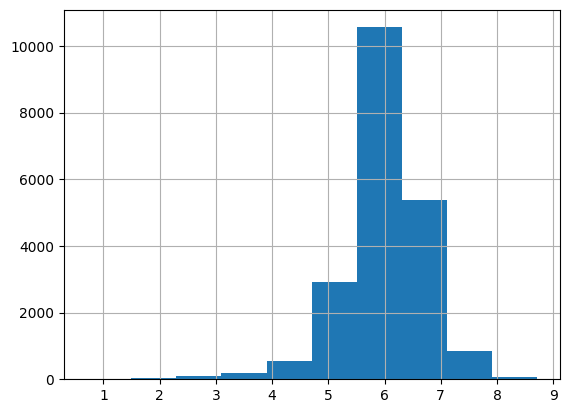

In [34]:
df['Log_Households'].hist()

<Axes: >

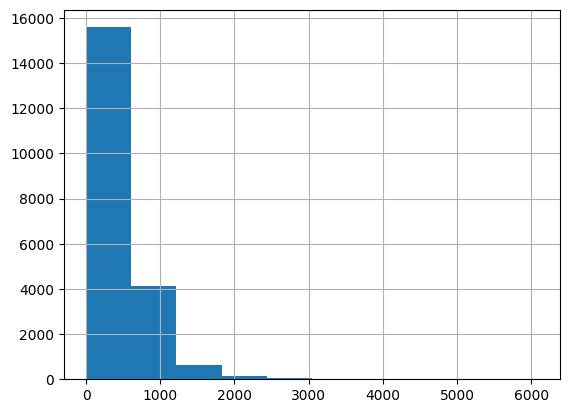

In [22]:
df['households'].hist()